In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitutes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "733ca8ab5d2826198a05f5a8b124bc41"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=733ca8ab5d2826198a05f5a8b124bc41


In [8]:
#Also, import the datetime module using the following code:

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        current_description = city_weather["weather"][0]["description"]
        try:
            city_snow_fall = city_weather["snow"]["1h"]
        except KeyError:
            city_snow_fall = 0
        try:
            city_rain_fall = city_weather["rain"]["1h"]
        except KeyError:
            city_rain_fall = 0
        
        
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Snowfall": city_snow_fall,
                          "Rainfall": city_rain_fall,
                          "Current Description": current_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | naron
Processing Record 13 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | kayerkan
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bongor
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | port elizabeth
Processing

Processing Record 34 of Set 4 | qingquan
Processing Record 35 of Set 4 | maniitsoq
Processing Record 36 of Set 4 | havre-saint-pierre
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | simbahan
Processing Record 39 of Set 4 | urumqi
Processing Record 40 of Set 4 | atambua
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | tsienyane
City not found. Skipping...
Processing Record 45 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 46 of Set 4 | mayumba
Processing Record 47 of Set 4 | kirakira
Processing Record 48 of Set 4 | kamskoye ustye
Processing Record 49 of Set 4 | ghanzi
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | susuman
Processing Record 2 of Set 5 | villazon
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Process

Processing Record 18 of Set 8 | naqadeh
Processing Record 19 of Set 8 | misratah
Processing Record 20 of Set 8 | iquitos
Processing Record 21 of Set 8 | portree
Processing Record 22 of Set 8 | ribeira grande
Processing Record 23 of Set 8 | tinskoy
Processing Record 24 of Set 8 | kahului
Processing Record 25 of Set 8 | kupang
Processing Record 26 of Set 8 | imphal
Processing Record 27 of Set 8 | verkhnyaya inta
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | demirci
Processing Record 30 of Set 8 | quang ngai
Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | omsukchan
Processing Record 33 of Set 8 | manjacaze
Processing Record 34 of Set 8 | veraval
Processing Record 35 of Set 8 | the pas
Processing Record 36 of Set 8 | barcelona
Processing Record 37 of Set 8 | ambanja
Processing Record 38 of Set 8 | saint anthony
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | ascension
Processing Record 41 of Set 8 | vrangel
Process

Processing Record 8 of Set 12 | parauna
Processing Record 9 of Set 12 | pimenta bueno
Processing Record 10 of Set 12 | niquero
Processing Record 11 of Set 12 | bagdarin
Processing Record 12 of Set 12 | taltal
Processing Record 13 of Set 12 | rutland
Processing Record 14 of Set 12 | dondo
Processing Record 15 of Set 12 | mezhdurechensk
Processing Record 16 of Set 12 | bara
Processing Record 17 of Set 12 | huangnihe
Processing Record 18 of Set 12 | sangueya
Processing Record 19 of Set 12 | aqtobe
Processing Record 20 of Set 12 | erdenet
Processing Record 21 of Set 12 | baglung
Processing Record 22 of Set 12 | broome
Processing Record 23 of Set 12 | itapetinga
Processing Record 24 of Set 12 | calabozo
Processing Record 25 of Set 12 | guaruja
Processing Record 26 of Set 12 | stutterheim
Processing Record 27 of Set 12 | jalu
Processing Record 28 of Set 12 | moindou
Processing Record 29 of Set 12 | dembi dolo
Processing Record 30 of Set 12 | suharau
Processing Record 31 of Set 12 | mamallapu

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Snowfall,Rainfall,Current Description
0,Arraial Do Cabo,-22.97,-42.03,77.00,61,62,5.82,BR,2020-07-12 22:31:43,0,0.00,broken clouds
1,Saldanha,-33.01,17.94,57.20,82,58,25.28,ZA,2020-07-12 22:31:43,0,1.65,moderate rain
2,Te Anau,-45.42,167.72,35.80,85,5,1.43,NZ,2020-07-12 22:28:57,0,0.00,clear sky
3,Jamestown,42.10,-79.24,73.99,73,1,10.29,US,2020-07-12 22:28:41,0,0.00,clear sky
4,Upernavik,72.79,-56.15,41.86,84,97,9.89,GL,2020-07-12 22:29:04,0,0.00,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mataura,-46.19,168.86,39.00,83,88,3.00,NZ,2020-07-12 22:31:59,0,0.00,overcast clouds
96,General Roca,-39.03,-67.58,46.40,61,100,2.24,AR,2020-07-12 22:31:59,0,0.00,overcast clouds
97,Qui Nhon,13.77,109.23,79.27,80,2,4.68,VN,2020-07-12 22:31:59,0,0.00,clear sky
98,Pyapon,16.28,95.68,78.75,86,100,7.56,MM,2020-07-12 22:32:00,0,1.53,moderate rain


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description", "Snowfall", "Rainfall"]

In [18]:

city_data_df = city_data_df[new_column_order]
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Snowfall,Rainfall
542,Huaicheng,CN,2020-07-12 22:33:19,23.91,112.19,77.61,91,78,1.34,broken clouds,0,0.0
543,Oranjestad,AW,2020-07-12 22:30:58,12.52,-70.03,84.20,79,40,18.34,scattered clouds,0,0.0
544,Castellammare Del Golfo,IT,2020-07-12 22:33:19,38.02,12.89,77.00,69,0,3.36,clear sky,0,0.0
545,Ville-Marie,CA,2020-07-12 22:33:13,47.33,-79.43,62.60,82,90,13.87,overcast clouds,0,0.0
546,Nishihara,JP,2020-07-12 22:29:09,26.18,127.76,84.20,83,40,5.82,scattered clouds,0,0.0
547,Pirovskoye,RU,2020-07-12 22:33:20,57.63,92.27,56.34,85,0,3.94,clear sky,0,0.0
548,Salalah,OM,2020-07-12 22:33:20,17.02,54.09,80.60,94,90,4.70,mist,0,0.0
549,Lubumbashi,CD,2020-07-12 22:33:20,-11.66,27.48,65.86,46,87,3.02,overcast clouds,0,0.0
550,Viedma,AR,2020-07-12 22:33:20,-40.81,-63.00,41.81,63,0,14.47,clear sky,0,0.0
551,Novocheremshansk,RU,2020-07-12 22:33:20,54.36,50.17,66.25,96,80,7.87,broken clouds,0,0.0


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/WeatherPy_database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594593689.5234833

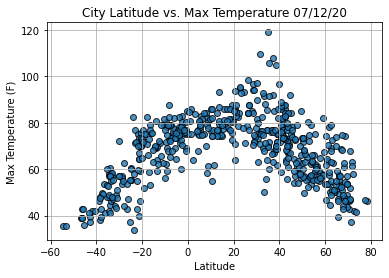

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

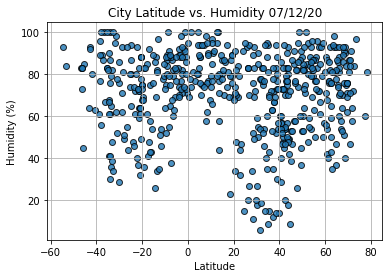

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

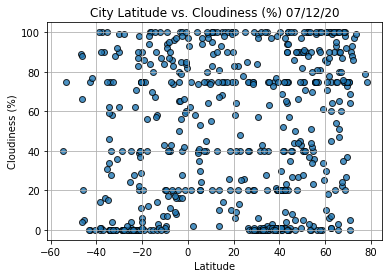

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

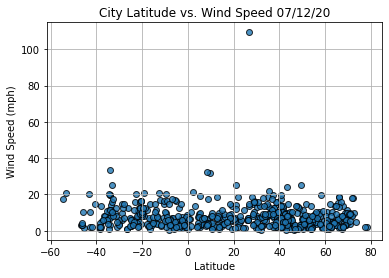

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()